In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn import cluster, preprocessing, metrics
import scipy 
import seaborn as sns
import folium

%matplotlib inline

In [3]:
dataset=pd.read_csv("makemytrip_com-travel_sample.csv")
dataset.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1246907446.py:1: DtypeWarning: Columns (12,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("makemytrip_com-travel_sample.csv")


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,...,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,21-06-2016,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,21-06-2016,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,21-06-2016,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,21-06-2016,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,21-06-2016,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


In [4]:
dataset.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'image_urls', 'in_your_room',
       'is_value_plus', 'latitude', 'longitude', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'qts', 'query_time_stamp',
       'room_types', 'site_review_count', 'site_review_rating', 'sitename',
       'state', 'traveller_rating', 'uniq_id'],
      dtype='object')

In [5]:
z= ["latitude","longitude", 'site_review_rating', 'room_types', 'property_address']
data= dataset[z]
df=pd.DataFrame(data)
df

,latitude,longitude,site_review_rating,room_types,property_address
0,24.581788,73.667805,4.5,NaN,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina..."
1,24.544342,73.644242,4.5,NaN,"Udaipur-Jhadol Road , Near Nai Gaon"
2,24.579942,73.681953,NaN,NaN,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne..."
3,24.622607,73.855194,NaN,`standard,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok"
4,24.580100,73.682200,3.7,NaN,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ..."
...,...,...,...,...,...
20031,11.769778,76.001652,NaN,Cottage (Standard Cottage),"Thonichal, Mananthavady , Thonichal, Mananthavady"
20032,25.310400,83.010200,NaN,Ac Single Room|Ac Double Room,"D 8/35, Kalika Gali, Near Kashi Vishvenath Tem..."
20033,12.307097,76.667002,NaN,Single|Double,"Vasanth Mahal Road, Nazarbad , Mysore"
20034,11.607579,76.082773,NaN,Standard Room,"Near Town Koram , Wayanad"


In [6]:
df.isna().sum()

latitude                 22
longitude                21
site_review_rating    19482
room_types             4880
property_address          4
dtype: int64

In [7]:
df = df.dropna()
df.isna().sum()

latitude              0
longitude             0
site_review_rating    0
room_types            0
property_address      0
dtype: int64

In [8]:
lower_bound = df['latitude'].quantile(0.01)
upper_bound = df['latitude'].quantile(0.99)
dfcopy2 = df[(df['latitude'] > lower_bound) & (df['latitude'] < upper_bound)]

lower_bound = df['longitude'].quantile(0.01)
upper_bound = df['longitude'].quantile(0.99)
df = df[(df['longitude'] > lower_bound) & (df['longitude'] < upper_bound)]

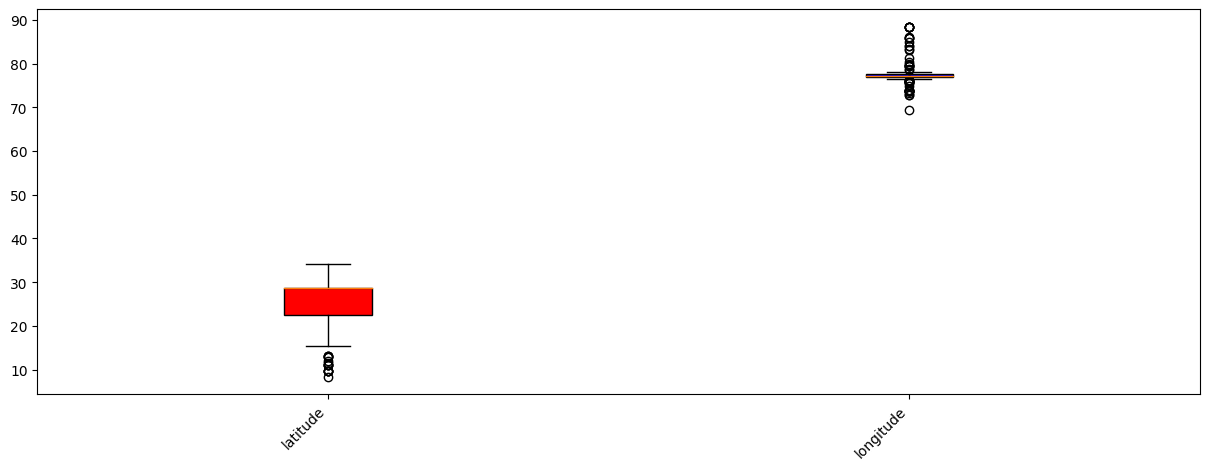

In [9]:
plots = [df['latitude'], df['longitude']]
colors=["red", "blue"]
plt.figure(figsize=(15,5))
box = plt.boxplot(plots, labels=['latitude', 'longitude'], patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=45, ha='right')
plt.show()

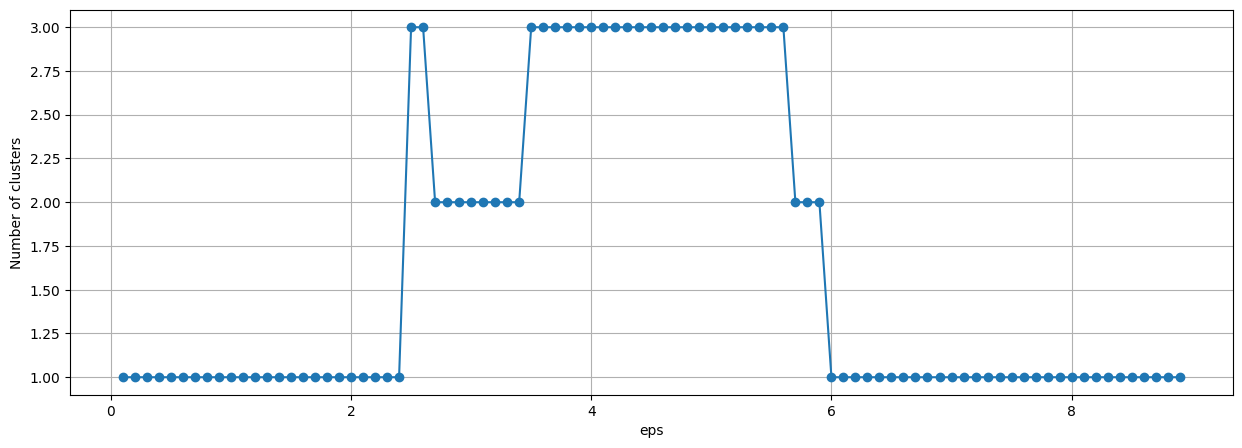

In [62]:
coords = df[['latitude', 'longitude']].values

eps_values = np.arange(0.1, 9, 0.1)

num_clusters = []

for eps in eps_values:
    dbscan = cluster.DBSCAN(eps=eps, min_samples=10)
    clusters = dbscan.fit_predict(coords)
    num_clusters.append(len(set(clusters)) - (1 if -1 in clusters else 0))

plt.figure(figsize=(15,5))
plt.plot(eps_values, num_clusters, marker='o')
plt.xlabel('eps')
plt.ylabel('Number of clusters')
plt.grid()
plt.show()

In [66]:
dbscan = cluster.DBSCAN(eps=5, min_samples=10).fit(coords)

metrics.silhouette_score(coords, dbscan.labels_)

0.7801676221061953

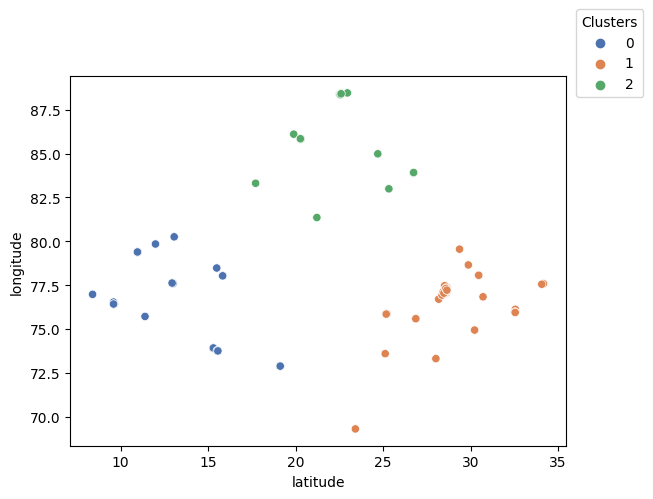

In [67]:
dbscan = cluster.DBSCAN(eps=5, min_samples=10).fit(coords)

p = sns.scatterplot(data=df, x="latitude", y="longitude", hue=dbscan.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [69]:
X = df[["latitude","longitude"]]
model = cluster.DBSCAN(eps=5, min_samples=10)
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
df[["cluster"]] = dtf_X[["cluster"]]
df

,latitude,longitude,site_review_rating,room_types,property_address,cluster
1684,12.986415,77.595370,4.6,Deluxe|Studio,"34, Cunningham Road , Cunningham Road",0
1685,12.936044,77.621610,4.3,Standard|Deluxe,"No 52, 5th Cross, 6th Block, Next to Vijaya Ba...",0
1686,19.115473,72.889134,3.3,Economy Room|Suite,"Saki Vihar Complex, Opp. Saki Vihar Road, Saki...",0
1730,26.864600,75.589900,4.8,Deluxe,"Village Sanjharia, Before Toll gate, Via Vatik...",1
2121,30.459626,78.063851,4.6,Standard (non View)|Super Deluxe ( View Side )...,"Monarch Hotel, Gandhi Chowk , Library Chowk",1
...,...,...,...,...,...,...
18890,20.296100,85.824500,4.2,Standard Non Ac|Standard AC|Deluxe Ac|Super De...,"366/A, Old Station Bazar, In front of Railway ...",2
18891,30.226976,74.942411,4.6,Deluxe Room|Executive Suite,"Barnala , Barnala Bye Paas Road",1
18893,11.388123,75.718613,3.8,Sea Facing|Beach Facing,"PO Chemancherry, Thoovappara, Kappad , Kappad",0
18894,20.268086,85.843338,3.5,Economy Non A/c Room|Royal Deluxe Room Non A/c...,"122/A New Station Square, Kharvelnagar , Railw...",2


In [71]:
x, y = "latitude", "longitude"
color = "cluster"
size = "site_review_rating"
popup = "property_address"
data = df.copy()
## create color column
lst_elements = sorted(list(df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], tiles="cartodbpositron",
                  zoom_start=5)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## plot the map
map_